In [2]:
import numpy as np
import tensorflow as tf
import IPython.display as display
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

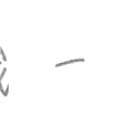

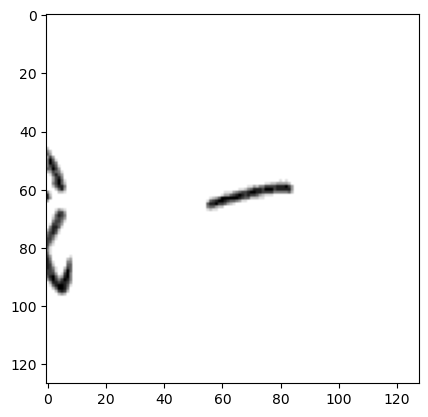

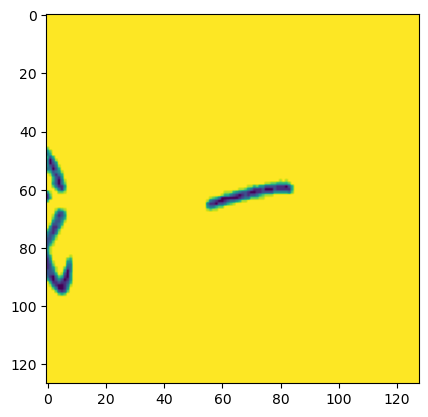

In [32]:
img_path = '/home/ceo/dev/data/ocr_JP/etlcdb-image-extractor/test_dataset/train/0x4e00/000078.png'
# img_path = '001418.jpg'
# img_path = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')

# image = tf.image.decode_png(img_path, channels=1)
im = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
im_mplt = imread(img_path,0)
cv2.imshow("piu",im)
display.display(display.Image(filename=img_path))
plt.imshow(im.astype("uint8"),cmap="gray")
plt.show()
plt.imshow(im.astype("uint8"))
plt.show()
# plt.imshow(im_mplt)

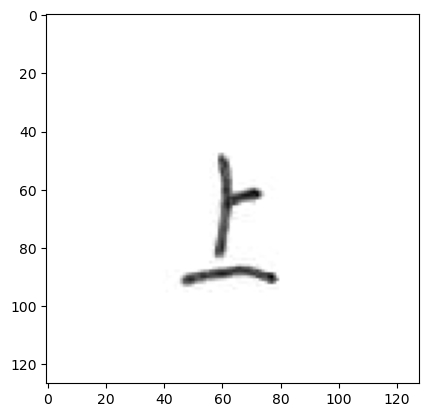

features {
  feature {
    key: "image_raw"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\300\000\013\010\000\177\000\200\001\001\021\000\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\203\204\205\206\207\210\211\212\222\223\224\225\226\227\230\231\232\242\243\244\245\246\247\250\251\252\262\263\264\265\266\267\270\271\272\302\303\304\305\306\307\310\311\312\322\323\324\325\326\327\330\331\332\341\34

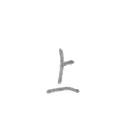

TypeError: Invalid shape (8,) for image data

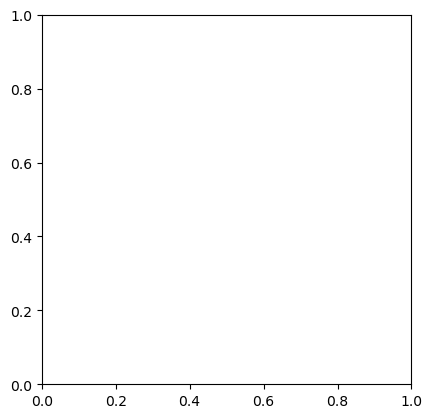

In [9]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


img_path0 = '../data/001418.jpg'
img_path1 = '/home/ceo/dev/data/ocr_JP/etlcdb-image-extractor/test_dataset/train/0x4e00/000078.png'

im = cv2.imread(img_path0,cv2.IMREAD_GRAYSCALE)
im_mplt = imread(img_path0,0)
plt.imshow(im.astype("uint8"),cmap="gray")
plt.show()

# This is an example, just using the cat image.
image_string = open(img_path0, 'rb').read()

label = 0

# Create a dictionary with features that may be relevant.
def image_example(image_string, label):

  feature = {
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
  print(line)
print('...')

image_path_list = [img_path0,img_path1]

record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for img_path in image_path_list:
    image_string = open(img_path, 'rb').read()

    tf_example = image_example(image_string,0)
    writer.write(tf_example.SerializeToString())


# Create a dictionary describing the features.
image_feature_description = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}



raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')


import numpy as  np
def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

for image_features in parsed_image_dataset:
  image_raw = image_features['image_raw'].numpy()
  image_raw_2 = np.frombuffer(image_features['image_raw'],dtype=np.uint8)
  display.display(display.Image(data=image_raw))
  plt.imshow(image_raw_2)
